<a href="https://colab.research.google.com/github/jarvis-2003/deeplearning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

In [1]:
things_to_do = {
    1:"data(prepare and load)",
    2:"build model",
    3:"fitting the model to data(training)",
    4:"making predictions and evaluating a model(inference)",
    5:"saving and loading the trained model",
    6:"putting it all together"
}
things_to_do

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading the trained model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn contains all the pytorch's building blocks for neural network
import matplotlib.pyplot as plt




## 1.Data (Preparing and loading)

Data can be almost anything ....in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has a lot of videos)
* Audio like songs or podcast
* DNA
* Text

Machine learning is a game of two parts

1. Get data into a numerical representation.

2. Build a model to learn partterns in thata numerical representation.

lets create some *known* data suing linear regression formula.

We'll use a linear regression  formula to fit a staright line with known parameters.



In [3]:
# create known parameters
bias = 0.3
weight = 0.7

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias


In [4]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data into training and  test sets (one of the most important topic)
Lets create a training and test set with our data .

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]

In [6]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

## Visualizaton of our data

In [7]:
def plot_prediction( train_data = X_train , train_labels = y_train,
                    test_data = X_test , test_label = y_test ,predictions=None):
  """
  Plots training data , test data and compares prediction.
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label = 'Training data')
  # plot test data in red
  plt.scatter(test_data,test_label,c="r",s=4,label='Testing data')

  # Are there predictions:
  if predictions is not None:
    plt.scatter(test_data,predictions,c="g",s=4,label="Predictions")

    # Show the legend
  plt.legend(prop={"size":14})
  plt.show()



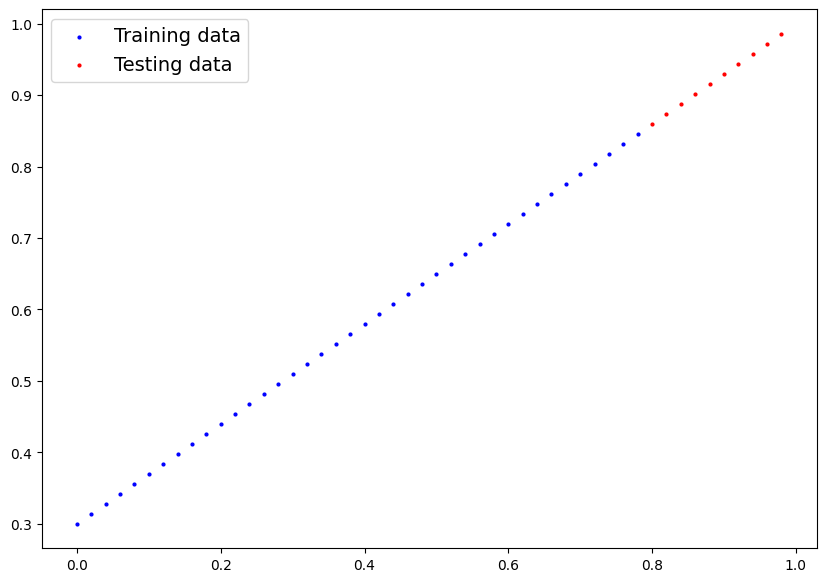

In [8]:
plot_prediction()

## 2. Build model

Our first pytorch model

This will be sure interesting

What our model does :
* Start with random values (weights and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we use to create the data)

How does it do so ?
 1. Gradient descent
 2. Backpropagation


In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
   # the linearregressionmodel class inherits nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True , dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

    # forward method to define the computation of a model
  def forward(self,x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

### Pytorch model building essentials

*  `torch.nn` - contains all the building for computational graphs(a neural network can be considered as computational graph)
* `torch.nn.Parameters` - what paramenters should our model try and learn , often a Pytorch layer from torch.nn will set these for us
* `torch.nn.Module` - its the base class for all neural network modules , if you sub class it you should overwrite forward()
* `torch.optim` - this is where the optimizer in Pytorch live, they will help with the gradient descent
* `def forward()` - All nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the content of our Pytorch model

In [10]:
# create a random seed first
torch.manual_seed(42)

# create an instace of the model
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [11]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [12]:
# Our goal to reach or make the random values of bias and weights close to
weight,bias

(0.7, 0.3)

## Making prediction using `torch.inference_mode()`.
 To check our model's predictive power, lets see how well it predicts `y_test` based on X_test

 When we pass data through our model, it's going to run it through the forward() method.

In [13]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

# inference turns off the grad off to it doesnot run the backpropagation in the call function or doesn't keep track of the weights

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

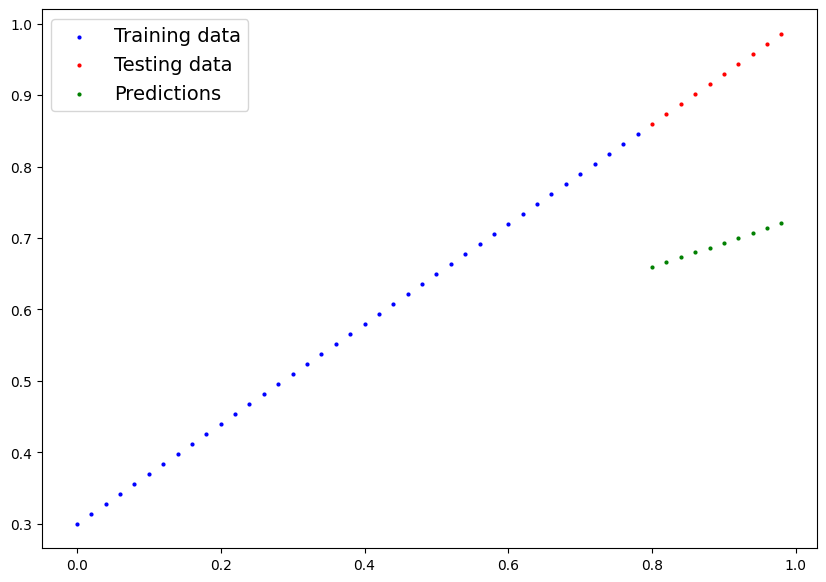

In [14]:
plot_prediction(predictions=y_preds)

### The model

The whoel idea of training is for a model to move from some unkonwn param(random)
to some known param


One way to measure how wrong your model prediction are to use a loss function

* Note : Loss function is also called a cost function .
* **Loss function:** A function to measure how wrong Your model's predictions are to you models output
* **Optimizer:** Takes into the account the loss of the model and adjust the models parameter(e.g weight and biases) to improve the loss function


And specifically for pytorch we need a:
* A training loop
* A testing loop

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup and Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)

### Building a training loop(and testing loop) in Pytorch

A couple of things we need in  a training loop:
1. Loop through the data
2. forward pass ( this involves moving through the models `forward()`)
3. Calculate the loss (compare forward pass prediction to ground labels)
4. Optimizer zero grad
5. loss backward - move backward through te network to calculate the gradient of each of the parameter of our model with respect to the loss (**backpropagation**)
6. Optimizer step - use the optimizer to adjust the models parameters to try and improve the loss

In [16]:
torch.manual_seed(42)
epochs = 300

models_progress = {}

# 0.loop through the data

for epoch in range(epochs):
  # set the model to training mode
  model_0.train()
  # 1.Forward pass
  y_pred = model_0(X_train)
  # 2. calculate the loss
  loss = loss_fn(y_pred,y_train)
  # 3. Optimizer zero_grad
  optimizer.zero_grad()
  # 4.Perform back propagation on the loss wrt to paramaters of the models
  loss.backward()
  # 5.Step the optimizer(perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    y_pred_test = model_0(X_test)

  loss_test = loss_fn(y_pred_test,y_test)
  if epoch % 10 == 0:
    models_progress[epoch] = {"Training_loss":loss , "test_loss":loss_test}



In [17]:
models_progress

{0: {'Training_loss': tensor(0.0817, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.2266)},
 10: {'Training_loss': tensor(0.0681, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.1807)},
 20: {'Training_loss': tensor(0.0626, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.1563)},
 30: {'Training_loss': tensor(0.0588, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.1419)},
 40: {'Training_loss': tensor(0.0553, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.1308)},
 50: {'Training_loss': tensor(0.0518, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.1205)},
 60: {'Training_loss': tensor(0.0484, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.1122)},
 70: {'Training_loss': tensor(0.0449, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.1046)},
 80: {'Training_loss': tensor(0.0415, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.0964)},
 90: {'Training_loss': tensor(0.0381, grad_fn=<MeanBackward0>),
  'test_loss': tensor(0.0881)},
 100: {'Training_loss': tensor(0.0346, gr

In [18]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [19]:
train_loss = []
test_loss = []
for x in models_progress:
  train_loss.append(models_progress[x].get("Training_loss").detach().numpy())
  test_loss.append(models_progress[x].get("test_loss").detach().numpy())

In [20]:
type(test_loss)

list

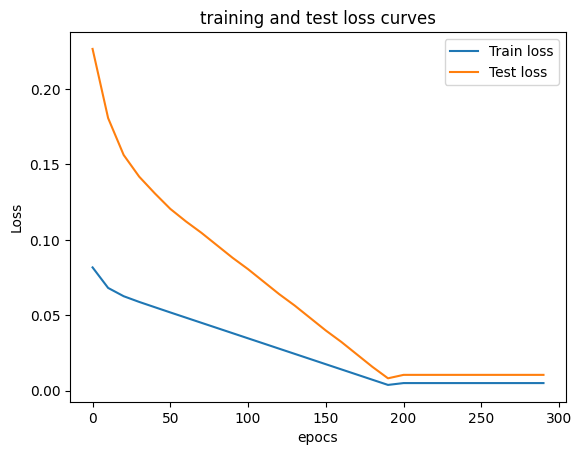

In [21]:
plt.plot(list(models_progress),train_loss,label = "Train loss")
plt.plot(list(models_progress),test_loss, label= "Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epocs")
plt.legend()


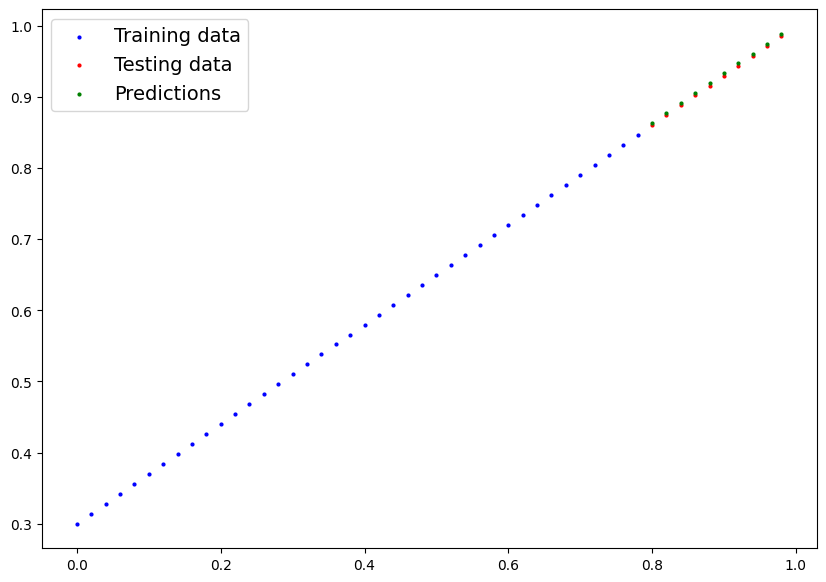

In [22]:
plot_prediction(predictions=y_pred_new)

## Saving a model in Pytorch

There are three main methods for saving and loading the model in pytorch.

1. `torch.save()` - allows you to save a pytorch object in python pickle format .

2. `torch.load()` - allows you to load the same pytorch object.

3. `torch.nn.Module.load_state_dict()` - this allows to load a models saved state dictionary

In [24]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the models state_dict
torch.save(model_0.state_dict,MODEL_SAVE_PATH)